In [1]:
import pandas as pd
import os
import json
from scipy.io import wavfile
import glob
import collections
import matplotlib.pyplot as plt
from python_speech_features import mfcc
import csv
from termcolor import colored,cprint
import os
import wave
from scipy.io.wavfile import read
from sklearn import preprocessing as pp
import numpy as np
import librosa
import librosa.display
import sklearn
import sklearn.ensemble
from sklearn.metrics import accuracy_score
from sklearn import decomposition 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

import soundfile as sf
import pickle

In [4]:
#to remove the warning of deprecated library
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)




audio_files = []

path1 = './Data/genres/blues'
path2 = './Data/genres/classical'
path3 = './Data/genres/country'
path4 = './Data/genres/disco'
path5 = './Data/genres/hiphop'
path6 = './Data/genres/jazz'
path7 = './Data/genres/metal'
path8 = './Data/genres/pop'
path9 = './Data/genres/reggae'
path10= './Data/genres/rock'

from scipy.io.wavfile import read

blues = []
classical = []
country = []
disco = []
hiphop = []
jazz = []
metal = []
pop = []
reggae= []
rock= []

target = []

for filename in glob.glob(os.path.join(path1, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    blues.append(data[:])
    target.append(1)

blues = np.array(blues)

  
for filename in glob.glob(os.path.join(path2, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    classical.append(data[:])
    target.append(2)
    
classical = np.array(classical)
    
for filename in glob.glob(os.path.join(path3, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    country.append(data[:])
    target.append(3)
    
country = np.array(country)
    
for filename in glob.glob(os.path.join(path4, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    disco.append(data[:])
    target.append(4)
disco = np.array(disco)
    
for filename in glob.glob(os.path.join(path5, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    hiphop.append(data[:])
    target.append(5)
    
hiphop = np.array(hiphop) 
    
for filename in glob.glob(os.path.join(path6, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    jazz.append(data[:])
    target.append(6)
    
jazz = np.array(jazz)
    
for filename in glob.glob(os.path.join(path7, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    metal.append(data[:])
    target.append(7)
    
metal = np.array(metal)
    
for filename in glob.glob(os.path.join(path8, '*.wav')):
    (data ,rate) = librosa.load(filename)
    data = np.array(data)
    pop.append(data[:])
    target.append(8)
    
pop = np.array(pop)

for filename in glob.glob(os.path.join(path9, '*.wav')):
    (data , rate) = librosa.load(filename)
    data = np.array(data)
    reggae.append(data[:])
    target.append(9)
    
reggae = np.array(reggae)

for filename in glob.glob(os.path.join(path10, '*.wav')):
    (data , rate ) = librosa.load(filename)
    data = np.array(data)
    rock.append(data[:])
    target.append(10)
    
rock = np.array(rock)




In [6]:
#FEATURE EXTRACTION
#Calculating the energy spectrums of different audio files of all the genres
blues_spectrum = []
classical_spectrum = []
country_spectrum = []
disco_spectrum = []
hiphop_spectrum = []
jazz_spectrum = []
metal_spectrum = []
pop_spectrum = []
reggae_spectrum = []
rock_spectrum = []

#librosa.stft(y) returns an array of phase and amplitude of the audio signal but we care about just amplitude so we multiply by 2

for i in range(100):
    
    blues_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(blues[i]))**2) ) #Compute a mel-scaled spectrogram of a Short-time Fourier transform (STFT)
    
    classical_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(classical[i]))**2))
    
    country_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(country[i]))**2))
    
    disco_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(disco[i]))**2))
    
    hiphop_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(hiphop[i]))**2))
    
    jazz_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(jazz[i]))**2))
    
    metal_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(metal[i]))**2))
    
    pop_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(pop[i]))**2))
    
    reggae_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(reggae[i]))**2))
    
    rock_spectrum.append(librosa.feature.melspectrogram(S = np.abs(librosa.stft(rock[i]))**2))
    

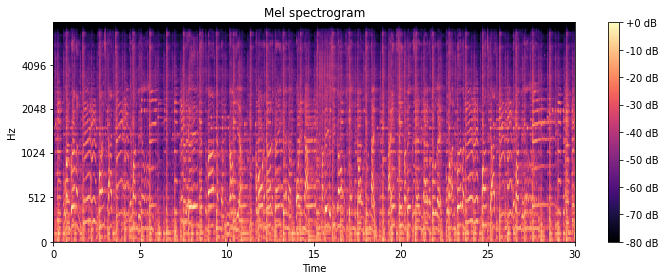

In [8]:
#Displaying the Mel Spectrogram :Mel spectrogram represents distribution of energies to pass it through mel filter banks. These mel filter banks ensures that the unpleasant noise or disturbances are removed from original data to avoid overfitting.

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(blues_spectrum[0], ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()
plt.show()

#we have used power_to_db for scaling of mel_spectrogram features and its representation in decibel unit.

(13,)
[ 2.3043875e+02  4.0325218e+01 -1.8193291e+01  1.2218742e+01
 -3.0621574e+00  7.0194197e+00 -2.7575459e+00  1.9763732e+00
 -4.5725071e-01  3.7209499e+00  1.5016536e-01  2.9395765e-01
 -2.1280081e+00]


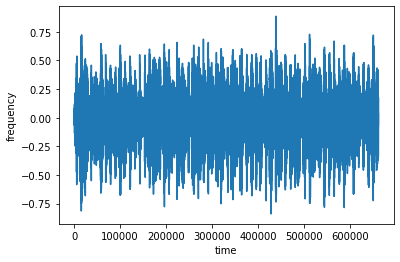

In [9]:
'''
MFCC(Mel Frequency Cepstral Coefficient) - this method is used for features extraction . The following steps are used for features extarction using mfcc:
1. spliting an original data(audio file) into small partitions (30 sec into many small partitions of 20msec)
2.For each frame calculate the periodogram estimate of the power spectrum.
3.Apply the mel filterbank to the power spectra, sum the energy in each filter.
4.Take the logarithm of all filterbank energies.
5.Take the DCT of the log filterbank energies.
6.Keep DCT coefficients 2-13, discard the rest
Apply mfcc to audio files and reducing the mfcc features by taking the mean value for those features and its dimensions to 13 features

'''
blues_mfcc = []
classical_mfcc = []
country_mfcc = []
disco_mfcc = []
hiphop_mfcc = []
jazz_mfcc = []
metal_mfcc = []
pop_mfcc = []
reggae_mfcc =[]
rock_mfcc =[] 


for i in range(100):
    blues_mfcc.append(np.mean(librosa.feature.mfcc(np.array(blues_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))    
    classical_mfcc.append(np.mean(librosa.feature.mfcc(np.array(classical_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    country_mfcc.append(np.mean(librosa.feature.mfcc(np.array(country_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    disco_mfcc.append(np.mean(librosa.feature.mfcc(np.array(disco_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    hiphop_mfcc.append(np.mean(librosa.feature.mfcc(np.array(hiphop_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    jazz_mfcc.append(np.mean(librosa.feature.mfcc(np.array(jazz_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    metal_mfcc.append(np.mean(librosa.feature.mfcc(np.array(metal_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    pop_mfcc.append(np.mean(librosa.feature.mfcc(np.array(pop_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    reggae_mfcc.append(np.mean(librosa.feature.mfcc(np.array(reggae_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    rock_mfcc.append(np.mean(librosa.feature.mfcc(np.array(rock_spectrum[i]).flatten() , 44100 , n_mfcc = 13) , axis = 1))
    
print(blues_mfcc[0].shape)
print(blues_mfcc[0])
plt.plot(blues[0])
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

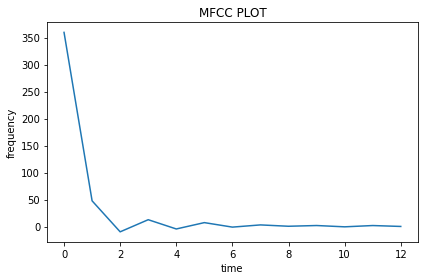

In [10]:
#MFCC PLOT
#plot for an MFCC of stereotype audio (dual audio channels with small difference in bandwidth)
plt.plot(country_mfcc[0])
plt.xlabel('time')
plt.ylabel('frequency')
plt.title('MFCC PLOT')
plt.tight_layout()
plt.show()

In [12]:
#Calculating delta and delta-delta for corresponding mfcc values
blues_mfcc_delta = []
classical_mfcc_delta = []
country_mfcc_delta = []
disco_mfcc_delta = []
hiphop_mfcc_delta = []
jazz_mfcc_delta = []
metal_mfcc_delta = []
pop_mfcc_delta = []
reggae_mfcc_delta= []
rock_mfcc_delta = []

blues_mfcc_delta2 = []
classical_mfcc_delta2 = []
country_mfcc_delta2 = []
disco_mfcc_delta2 = []
hiphop_mfcc_delta2 = []
jazz_mfcc_delta2 = []
metal_mfcc_delta2 = []
pop_mfcc_delta2 = []
reggae_mfcc_delta2 = []
rock_mfcc_delta2 = []


for i in range(100):
    blues_mfcc_delta.append(librosa.feature.delta(blues_mfcc[i]))
    classical_mfcc_delta.append(librosa.feature.delta(classical_mfcc[i]))
    country_mfcc_delta.append(librosa.feature.delta(country_mfcc[i]))
    disco_mfcc_delta.append(librosa.feature.delta(disco_mfcc[i]))
    hiphop_mfcc_delta.append(librosa.feature.delta(hiphop_mfcc[i]))
    jazz_mfcc_delta.append(librosa.feature.delta(jazz_mfcc[i]))
    metal_mfcc_delta.append(librosa.feature.delta(metal_mfcc[i]))
    pop_mfcc_delta.append(librosa.feature.delta(pop_mfcc[i]))
    reggae_mfcc_delta.append(librosa.feature.delta(reggae_mfcc[i]))
    rock_mfcc_delta.append(librosa.feature.delta(rock_mfcc[i]))
    

print(blues_mfcc_delta[0])
print('shape of delta :' , blues_mfcc_delta[0].shape)

for i in range(100):
    blues_mfcc_delta2.append(librosa.feature.delta(blues_mfcc[i] , order = 2))
    classical_mfcc_delta2.append(librosa.feature.delta(classical_mfcc[i] , order = 2))
    country_mfcc_delta2.append(librosa.feature.delta(country_mfcc[i] , order = 2))
    disco_mfcc_delta2.append(librosa.feature.delta(disco_mfcc[i] , order = 2))
    hiphop_mfcc_delta2.append(librosa.feature.delta(hiphop_mfcc[i] , order = 2))
    jazz_mfcc_delta2.append(librosa.feature.delta(jazz_mfcc[i] , order = 2))
    metal_mfcc_delta2.append(librosa.feature.delta(metal_mfcc[i] , order = 2))
    pop_mfcc_delta2.append(librosa.feature.delta(pop_mfcc[i] , order = 2))
    reggae_mfcc_delta2.append(librosa.feature.delta(reggae_mfcc[i], order = 2))
    rock_mfcc_delta2.append(librosa.feature.delta(rock_mfcc[i], order = 2))

print(blues_mfcc_delta2[0])
print('shape of delta2 :' , blues_mfcc_delta2[0].shape)


print(blues_mfcc_delta[2])
print(blues_mfcc_delta2[2])

[-16.882639   -16.882639   -16.882639   -16.882639   -16.882639
  -1.889818     0.8007869   -0.70598024  -0.1479965   -0.1479965
  -0.1479965   -0.1479965   -0.1479965 ]
shape of delta : (13,)
[14.366654   14.366654   14.366654   14.366654   14.366654    2.0513518
 -1.0027099   0.56098    -0.34844464 -0.34844464 -0.34844464 -0.34844464
 -0.34844464]
shape of delta2 : (13,)
[-20.89714   -20.89714   -20.89714   -20.89714   -20.89714    -2.7745016
   0.48699    -0.9760659   0.0477014   0.0477014   0.0477014   0.0477014
   0.0477014]
[17.655209   17.655209   17.655209   17.655209   17.655209    2.7854123
 -1.0204967   0.76128304 -0.07058037 -0.07058037 -0.07058037 -0.07058037
 -0.07058037]


In [14]:
#Calculating the rhythmic features for the audio files
#The rythmic features consists of beats and tempo.
#Beat refers to pulse of time . Recognizing the beat in a song means finding the pattern and speed of the music.
blues_tempo = []
classical_tempo = []
country_tempo = []
disco_tempo = []
hiphop_tempo = []
jazz_tempo = []
metal_tempo = []
pop_tempo = []
reggae_tempo=[]
rock_tempo=[]



for i in range(100):
    oenv_blues = librosa.onset.onset_strength(y = blues[i], sr= 44100, hop_length = 512)
    blues_tempo.append(librosa.beat.tempo(onset_envelope=oenv_blues ,sr=44100,hop_length=512)[0])
    
    oenv_classical = librosa.onset.onset_strength(y = classical[i], sr= 44100, hop_length = 512)
    classical_tempo.append(librosa.beat.tempo(onset_envelope=oenv_classical ,sr=44100,hop_length=512)[0])
    
    oenv_country = librosa.onset.onset_strength(y = country[i], sr= 44100, hop_length = 512)
    country_tempo.append(librosa.beat.tempo(onset_envelope=oenv_country ,sr=44100,hop_length=512)[0])
    
    oenv_disco = librosa.onset.onset_strength(y = disco[i], sr= 44100, hop_length = 512)
    disco_tempo.append(librosa.beat.tempo(onset_envelope=oenv_disco ,sr=44100,hop_length=512)[0])
    
    oenv_hiphop = librosa.onset.onset_strength(y = hiphop[i], sr= 44100, hop_length = 512)
    hiphop_tempo.append(librosa.beat.tempo(onset_envelope=oenv_hiphop ,sr=44100,hop_length=512)[0])
    
    oenv_jazz = librosa.onset.onset_strength(y = jazz[i], sr= 44100, hop_length = 512)
    jazz_tempo.append(librosa.beat.tempo(onset_envelope=oenv_jazz ,sr=44100,hop_length=512)[0])
    
    oenv_metal = librosa.onset.onset_strength(y = metal[i], sr= 44100, hop_length = 512)
    metal_tempo.append(librosa.beat.tempo(onset_envelope=oenv_metal ,sr=44100,hop_length=512)[0])
    
    oenv_pop = librosa.onset.onset_strength(y = pop[i], sr= 44100, hop_length = 512)
    pop_tempo.append(librosa.beat.tempo(onset_envelope=oenv_pop ,sr=44100,hop_length=512)[0])
    
    oenv_reggae = librosa.onset.onset_strength(y = reggae[i], sr= 44100, hop_length = 512)
    reggae_tempo.append(librosa.beat.tempo(onset_envelope=oenv_reggae ,sr=44100,hop_length=512)[0])
    
    oenv_rock = librosa.onset.onset_strength(y = rock[i], sr= 44100, hop_length = 512)
    rock_tempo.append(librosa.beat.tempo(onset_envelope=oenv_rock ,sr=44100,hop_length=512)[0])

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
c:\users\asus\appdata\local\programs\python

[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]


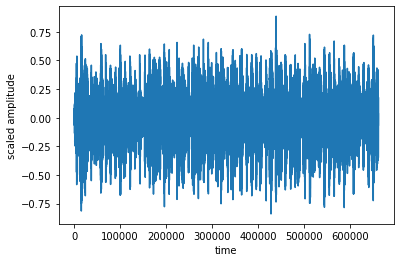

In [18]:
#PREPROCESSING
#MinMaxScaling or normalization is to transform features by scaling each feature to a given range(0,1)
blues_scale = []
classical_scale = []
country_scale = []
disco_scale = []
hiphop_scale = []
jazz_scale = []
metal_scale = []
pop_scale = []
reggae_scale = []
rock_scale = [] 


for i in range(len(blues)):
    blues_scale.append(pp.scale(blues[i]))
    classical_scale.append( pp.scale(classical[i]))
    country_scale.append(pp.scale(country[i]))
    disco_scale.append(pp.scale(disco[i]))
    hiphop_scale.append(pp.scale(hiphop[i]))
    jazz_scale.append(pp.scale(jazz[i]))
    metal_scale.append(pp.scale(metal[i]))
    pop_scale.append(pp.scale(pop[i]))

print(blues[0])
plt.plot(blues[0])
plt.xlabel('time')
plt.ylabel('scaled amplitude')
plt.show()

In [19]:
#Adding X_value features and Target_features to form a dataset for applying cross_validation

dataset = [[0 for i in range(0, 41)]for j in range(0,1000)]  #41 because blues_mfcc[0].shape=13 , blues_mfcc_delta[0]=13 , blues_mfcc_delta2[0]=13 , 1 for blues_tempo , 1 for target 
l = []
prev = []
k = 0

for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = blues_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = blues_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = blues_mfcc_delta2[i][j]
    dataset[k][39] = blues_tempo[i]
    dataset[k][40] = target[i]    
    k += 1
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = classical_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = classical_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = classical_mfcc_delta2[i][j]
    dataset[k][39] = classical_tempo[i]
    dataset[k][40] = target[i+100]    
    k += 1    
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = country_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = country_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = country_mfcc_delta2[i][j]
    dataset[k][39] = country_tempo[i]
    dataset[k][40] = target[i+200]    
    k += 1

for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = disco_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = disco_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = disco_mfcc_delta2[i][j]
    dataset[k][39] = disco_tempo[i]    
    dataset[k][40] = target[i+300]    
    k += 1
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = hiphop_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = hiphop_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = hiphop_mfcc_delta2[i][j]
    dataset[k][39] = hiphop_tempo[i]
    dataset[k][40] = target[i+400]    
    k += 1    
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = jazz_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = jazz_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = jazz_mfcc_delta2[i][j]
    dataset[k][39] = jazz_tempo[i]
    dataset[k][40] = target[i+500]    
    k += 1 
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = metal_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = metal_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = metal_mfcc_delta2[i][j]
    dataset[k][39] = metal_tempo[i]
    dataset[k][40] = target[i+600]    
    k += 1    
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = pop_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = pop_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = pop_mfcc_delta2[i][j]
    dataset[k][39] = pop_tempo[i]
    dataset[k][40] = target[i+700]    
    k += 1      
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = reggae_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = reggae_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = reggae_mfcc_delta2[i][j]
    dataset[k][39] = reggae_tempo[i]
    dataset[k][40] = target[i+800]    
    k += 1   
    
for i in range(100):
    l = []
    for j in range(13):
        dataset[k][j] = rock_mfcc[i][j]
    for j in range(13):
        dataset[k][j+13] = rock_mfcc_delta[i][j]
    for j in range(13):
        dataset[k][j+26] = rock_mfcc_delta2[i][j]
    dataset[k][39] = rock_tempo[i]
    dataset[k][40] = target[i+900]    
    k += 1   
    
dataset = np.array(dataset)
print(np.array(dataset)[2].shape)
print(dataset[2])

print(dataset.shape)
dataset[3]

(41,)
[ 2.81583069e+02  5.20271492e+01 -1.77781811e+01  1.51379986e+01
 -2.06324267e+00  6.31889772e+00 -4.72181511e+00  1.95349669e+00
  1.35780215e+00  3.31453085e+00 -2.22490239e+00  6.00534141e-01
  1.35233617e+00 -2.08971405e+01 -2.08971405e+01 -2.08971405e+01
 -2.08971405e+01 -2.08971405e+01 -2.77450156e+00  4.86990005e-01
 -9.76065874e-01  4.77014035e-02  4.77014035e-02  4.77014035e-02
  4.77014035e-02  4.77014035e-02  1.76552086e+01  1.76552086e+01
  1.76552086e+01  1.76552086e+01  1.76552086e+01  2.78541231e+00
 -1.02049673e+00  7.61283040e-01 -7.05803707e-02 -7.05803707e-02
 -7.05803707e-02 -7.05803707e-02 -7.05803707e-02  1.56605114e+02
  1.00000000e+00]
(1000, 41)


array([ 2.27328094e+02,  2.59750805e+01, -9.57898998e+00,  6.74506521e+00,
       -1.57753682e+00,  2.94954228e+00, -9.16223407e-01,  2.08560777e+00,
        4.73205239e-01,  7.19763279e-01, -8.79608452e-01, -2.39962384e-01,
       -7.07633555e-01, -1.60926323e+01, -1.60926323e+01, -1.60926323e+01,
       -1.60926323e+01, -1.60926323e+01, -1.32537138e+00,  3.32652837e-01,
       -4.81940925e-01, -1.23025261e-01, -1.23025261e-01, -1.23025261e-01,
       -1.23025261e-01, -1.23025261e-01,  1.41246004e+01,  1.41246004e+01,
        1.41246004e+01,  1.41246004e+01,  1.41246004e+01,  1.29106677e+00,
       -6.47241116e-01,  2.19496906e-01, -1.90057293e-01, -1.90057293e-01,
       -1.90057293e-01, -1.90057293e-01, -1.90057293e-01,  1.26048018e+02,
        1.00000000e+00])

In [20]:
#Applying PCA(Principal Component Analysis) for feature reduction
sc =pp.StandardScaler()
print(sc)
dataset1 = sc.fit_transform(dataset[:, 0:40])
dataset1 = dataset[:, 0:40]
print(dataset1.shape)
print(dataset1[3].mean())
print(dataset1[2].shape)
print(dataset1[2])

StandardScaler()
(1000, 40)
9.160187833597202
(40,)
[ 2.81583069e+02  5.20271492e+01 -1.77781811e+01  1.51379986e+01
 -2.06324267e+00  6.31889772e+00 -4.72181511e+00  1.95349669e+00
  1.35780215e+00  3.31453085e+00 -2.22490239e+00  6.00534141e-01
  1.35233617e+00 -2.08971405e+01 -2.08971405e+01 -2.08971405e+01
 -2.08971405e+01 -2.08971405e+01 -2.77450156e+00  4.86990005e-01
 -9.76065874e-01  4.77014035e-02  4.77014035e-02  4.77014035e-02
  4.77014035e-02  4.77014035e-02  1.76552086e+01  1.76552086e+01
  1.76552086e+01  1.76552086e+01  1.76552086e+01  2.78541231e+00
 -1.02049673e+00  7.61283040e-01 -7.05803707e-02 -7.05803707e-02
 -7.05803707e-02 -7.05803707e-02 -7.05803707e-02  1.56605114e+02]


In [21]:
#Splitting the dataset into training and testing data using cross_validation technique
train_x , test_x , train_y , test_y = train_test_split(dataset1 , target , test_size = 0.25 , random_state = 42)

In [22]:
#TRAINING Step
#Random Forest Classifier
cls = sklearn.ensemble.RandomForestClassifier(n_estimators = 10 , criterion = 'entropy' , min_samples_split = 8)
models = []
accuracy = []
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('random-forest')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ', accuracy_score(test_y , Y)*100)

Accuracy :  43.2


In [23]:
#Random Forest Classifier (save data in a file)
#pickling the randomForestClassifier (it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network)
random_forest_file_name = 'random_forest1.pkl'
random_forest_model_pkl = open(random_forest_file_name , 'wb')
pickle.dump(cls ,random_forest_model_pkl)
random_forest_model_pkl.close()

In [24]:
#Random Forest Classifier(print CONFUSION MATRIX & CLASSIFICATION REPORT)
cprint('CONFUSION MATRIX', 'green')
print(confusion_matrix(test_y, Y))

cprint('\nCLASSIFICATION REPORT\n','green')
print(classification_report(test_y, Y))

CONFUSION MATRIX
[[11  1  0  3  2  3  2  3  2  2]
 [ 0 16  1  0  0  0  0  0  0  0]
 [ 1  2 11  2  0  6  2  4  0  3]
 [ 1  0  0 14  2  0  1  4  1  4]
 [ 0  0  0  2 12  0  0  2  1  1]
 [ 1  9  2  1  0 15  0  0  1  0]
 [ 1  1  4  3  2  2  8  5  1  1]
 [ 3  0  2  2  1  0  1  4  1  2]
 [ 5  0  3  2  2  1  2  2  9  1]
 [ 2  1  6  3  0  3  3  1  1  8]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.44      0.38      0.41        29
           2       0.53      0.94      0.68        17
           3       0.38      0.35      0.37        31
           4       0.44      0.52      0.47        27
           5       0.57      0.67      0.62        18
           6       0.50      0.52      0.51        29
           7       0.42      0.29      0.34        28
           8       0.16      0.25      0.20        16
           9       0.53      0.33      0.41        27
          10       0.36      0.29      0.32        28

    accuracy                    

In [25]:
#K Neighbors Classifier
cls = sklearn.neighbors.KNeighborsClassifier()
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('k-neighbors')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' ,accuracy_score(test_y , Y)*100 )

Accuracy :  30.4


In [26]:
# K Neighbors Classifier(save data in a file)
#pickling the K Neighbors Classifier (it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network)
KNeighbors_file_name = 'KNeighbors.pkl'
KNeighbors_model_pkl = open(KNeighbors_file_name , 'wb')
pickle.dump(cls ,KNeighbors_model_pkl)
KNeighbors_model_pkl.close()

In [27]:
#Random K Neighbors Classifier(print CONFUSION MATRIX & CLASSIFICATION REPORT)

cprint('CONFUSION MATRIX', 'green')
print(confusion_matrix(test_y, Y))

cprint('\nCLASSIFICATION REPORT\n','green')
print(classification_report(test_y, Y))

CONFUSION MATRIX
[[ 5  3  3  4  2  1  3  4  3  1]
 [ 0 15  0  0  0  1  0  0  0  1]
 [ 2  1  8  4  0  2  4  5  1  4]
 [ 6  0  1  9  3  0  3  4  0  1]
 [ 3  0  0  1 11  0  2  0  1  0]
 [ 4 13  3  1  0  3  2  0  0  3]
 [ 4  2  3  4  1  1  9  3  0  1]
 [ 0  1  2  1  3  1  0  7  0  1]
 [ 8  0  4  4  3  2  2  0  3  1]
 [ 8  3  3  3  1  2  2  0  0  6]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.12      0.17      0.14        29
           2       0.39      0.88      0.55        17
           3       0.30      0.26      0.28        31
           4       0.29      0.33      0.31        27
           5       0.46      0.61      0.52        18
           6       0.23      0.10      0.14        29
           7       0.33      0.32      0.33        28
           8       0.30      0.44      0.36        16
           9       0.38      0.11      0.17        27
          10       0.32      0.21      0.26        28

    accuracy                    

In [28]:
#SVM Classifier
cls = sklearn.svm.SVC(C = 5000, gamma = 0.0005, kernel = 'rbf')
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('svm')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' ,accuracy_score(test_y , Y)*100)

Accuracy :  37.2


In [29]:
#pickling the SVM
SVM_file_name = 'SVM.pkl'
SVM_model_pkl = open(SVM_file_name , 'wb')
pickle.dump(cls ,SVM_model_pkl)
SVM_model_pkl.close()

In [30]:
#SVM Classifier(print CONFUSION MATRIX & CLASSIFICATION REPORT)

cprint('CONFUSION MATRIX', 'green')
print(confusion_matrix(test_y, Y))

cprint('\nCLASSIFICATION REPORT\n','green')
print(classification_report(test_y, Y))

CONFUSION MATRIX
[[10  0  3  2  2  3  2  3  4  0]
 [ 0 16  1  0  0  0  0  0  0  0]
 [ 3  2 11  2  0  1  1  2  1  8]
 [ 1  0  0  9  1  0  3  6  4  3]
 [ 2  0  0  0 10  0  1  3  1  1]
 [ 1  9  4  2  0 10  0  0  0  3]
 [ 5  1  1  4  1  1  9  3  0  3]
 [ 1  0  2  2  2  0  1  7  0  1]
 [ 7  0  4  2  1  1  4  2  5  1]
 [ 2  1  6  5  0  3  1  3  1  6]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.31      0.34      0.33        29
           2       0.55      0.94      0.70        17
           3       0.34      0.35      0.35        31
           4       0.32      0.33      0.33        27
           5       0.59      0.56      0.57        18
           6       0.53      0.34      0.42        29
           7       0.41      0.32      0.36        28
           8       0.24      0.44      0.31        16
           9       0.31      0.19      0.23        27
          10       0.23      0.21      0.22        28

    accuracy                    

In [31]:
#Decision Tree Classifier
cls = sklearn.tree.DecisionTreeClassifier()
cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('decision-tree')
accuracy.append(accuracy_score(test_y , Y)*100)
print('Accuracy : ' , accuracy_score(test_y , Y)*100)

Accuracy :  37.2


In [32]:
#pickling the DecisionTreeClassifier
DecisionTreeClassifier_file_name = 'DecisionTreeClassifier.pkl'
DecisionTreeClassifier_model_pkl = open(DecisionTreeClassifier_file_name , 'wb')
pickle.dump(cls ,DecisionTreeClassifier_model_pkl)
DecisionTreeClassifier_model_pkl.close()

In [33]:
#Decision Tree Classifier(print CONFUSION MATRIX & CLASSIFICATION REPORT)

cprint('CONFUSION MATRIX', 'green')
print(confusion_matrix(test_y, Y))

cprint('\nCLASSIFICATION REPORT\n','green')
print(classification_report(test_y, Y))

CONFUSION MATRIX
[[ 9  0  4  2  1  2  2  4  1  4]
 [ 1 11  1  0  0  2  0  1  1  0]
 [ 1  4  9  0  0  3  5  3  0  6]
 [ 2  0  1 10  3  0  5  3  0  3]
 [ 2  0  0  2  9  0  1  1  3  0]
 [ 1  8  3  0  0 15  0  2  0  0]
 [ 3  3  1  3  0  0  8  5  2  3]
 [ 3  0  1  2  2  0  1  5  1  1]
 [ 2  0  4  3  1  2  1  1 11  2]
 [ 3  2  2  6  0  1  3  2  3  6]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.33      0.31      0.32        29
           2       0.39      0.65      0.49        17
           3       0.35      0.29      0.32        31
           4       0.36      0.37      0.36        27
           5       0.56      0.50      0.53        18
           6       0.60      0.52      0.56        29
           7       0.31      0.29      0.30        28
           8       0.19      0.31      0.23        16
           9       0.50      0.41      0.45        27
          10       0.24      0.21      0.23        28

    accuracy                    

In [34]:
#Best Classification
#XGBClassifier
cls = XGBClassifier()

cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('xgboost')
accuracy.append(accuracy_score(test_y , Y)*100)
print('accuracy : ' , accuracy_score(test_y , Y)*100)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :  49.6


In [35]:
#pickling the XGBClassifier
XGBClassifier_file_name = 'XGBClassifier.pkl'
XGBClassifier_model_pkl = open(XGBClassifier_file_name , 'wb')
pickle.dump(cls ,XGBClassifier_model_pkl)
XGBClassifier_model_pkl.close()

In [36]:
#XGBClassifier(print CONFUSION MATRIX & CLASSIFICATION REPORT)

cprint('CONFUSION MATRIX', 'green')
print(confusion_matrix(test_y, Y))

cprint('\nCLASSIFICATION REPORT\n','green')
print(classification_report(test_y, Y))

CONFUSION MATRIX
[[10  1  2  2  0  2  0  3  3  6]
 [ 0 17  0  0  0  0  0  0  0  0]
 [ 0  5 10  3  0  3  2  3  1  4]
 [ 2  0  0 13  2  0  3  5  0  2]
 [ 0  0  0  1 11  0  1  3  2  0]
 [ 1  5  2  0  0 19  0  0  2  0]
 [ 0  2  3  2  2  0 14  4  0  1]
 [ 1  0  1  0  1  0  1  7  2  3]
 [ 0  0  2  1  2  1  3  2 14  2]
 [ 0  0  2  6  0  6  2  3  0  9]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.71      0.34      0.47        29
           2       0.57      1.00      0.72        17
           3       0.45      0.32      0.38        31
           4       0.46      0.48      0.47        27
           5       0.61      0.61      0.61        18
           6       0.61      0.66      0.63        29
           7       0.54      0.50      0.52        28
           8       0.23      0.44      0.30        16
           9       0.58      0.52      0.55        27
          10       0.33      0.32      0.33        28

    accuracy                    

In [38]:
#Gradient Boosting Classifier
cls = sklearn.ensemble.GradientBoostingClassifier()

cls.fit(train_x , train_y)
Y = cls.predict(test_x)
models.append('gradientboosting')
accuracy.append(accuracy_score(test_y , Y)*100)
print('accuracy : ' , accuracy_score(test_y , Y)*100)

accuracy :  47.599999999999994


In [40]:
#pickling the GradientBoostingClassifier
GradientBoostingClassifier_file_name = 'GradientBoostingClassifier1.pkl'
GradientBoostingClassifier_model_pkl = open(GradientBoostingClassifier_file_name , 'wb')
pickle.dump(cls ,GradientBoostingClassifier_model_pkl)
GradientBoostingClassifier_model_pkl.close()

In [41]:
#GradientBoostingclassifier(print CONFUSION MATRIX & CLASSIFICATION REPORT)

cprint('CONFUSION MATRIX', 'green')
print(confusion_matrix(test_y, Y))

cprint('\nCLASSIFICATION REPORT\n','green')
print(classification_report(test_y, Y))

CONFUSION MATRIX
[[13  0  1  2  0  1  2  4  2  4]
 [ 1 15  1  0  0  0  0  0  0  0]
 [ 0  3  9  3  0  3  2  3  1  7]
 [ 2  0  0 15  2  0  3  3  0  2]
 [ 0  0  0  0 12  0  2  3  1  0]
 [ 1  6  3  0  0 17  0  1  1  0]
 [ 1  2  1  4  1  0 12  3  0  4]
 [ 1  0  1  2  1  0  1  6  2  2]
 [ 2  0  3  1  3  1  0  3 12  2]
 [ 0  0  6  4  1  4  2  3  0  8]]

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           1       0.62      0.45      0.52        29
           2       0.58      0.88      0.70        17
           3       0.36      0.29      0.32        31
           4       0.48      0.56      0.52        27
           5       0.60      0.67      0.63        18
           6       0.65      0.59      0.62        29
           7       0.50      0.43      0.46        28
           8       0.21      0.38      0.27        16
           9       0.63      0.44      0.52        27
          10       0.28      0.29      0.28        28

    accuracy                    